# 1. Introduction

## Description du data set

## Objectifs du projet

# 2. Importer des Bibliothèques Nécessaires

In [119]:
import numpy as np   # Permet le traitement des valeurs Algebriques (les matrices)
import pandas as pd  #  Permet le manipulation des données
import matplotlib.pyplot as plt # Permet de faire la visualisation graphiaue
import seaborn as sns    # Permet de faire la visualisation graphiaue
import statistics # Pour les calculs statistiques
import missingno as msn  # Permet de visualiser les valeurs manquantes
import statistics

#import warnings       # Traitement des avertissement
#warnings.filterwarnings('ignore') # Permet d'ignorer les avertissements en couleur apres compilation
#from sklearn.impute import SimpleImputer , KNNImputer 
#from sklearn.impute import KNNImputer

# 3. Lecture du data set

In [120]:
data = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [121]:
#Connaitre le nombre de ligne et de colonne de mon data set
print(data.shape)

(614, 13)


In [122]:
#Savoir plus sur chacune de mes variables
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


## 3.1. Erreur de type

In [123]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [124]:
#Conversion de la colonne Credit_History de type float en type object
data['Credit_History']=data['Credit_History'].astype("object")

# 4. Data cleaning

## 4.1. Identification des valeurs manquantes

In [125]:
missing_values = data.isna().sum()
missing_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 4.1.1. Table des valeurs manquantes

In [126]:
missing_percent = (missing_values/len(data))*100
missing_table = pd.DataFrame({"Valeurs manquantes ": missing_values,
                             "Pourcentage" : missing_percent})
missing_table

,Valeurs manquantes,Pourcentage
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


### 4.1.2. Analyse des correlation entre des valeurs manquantes

<Axes: >

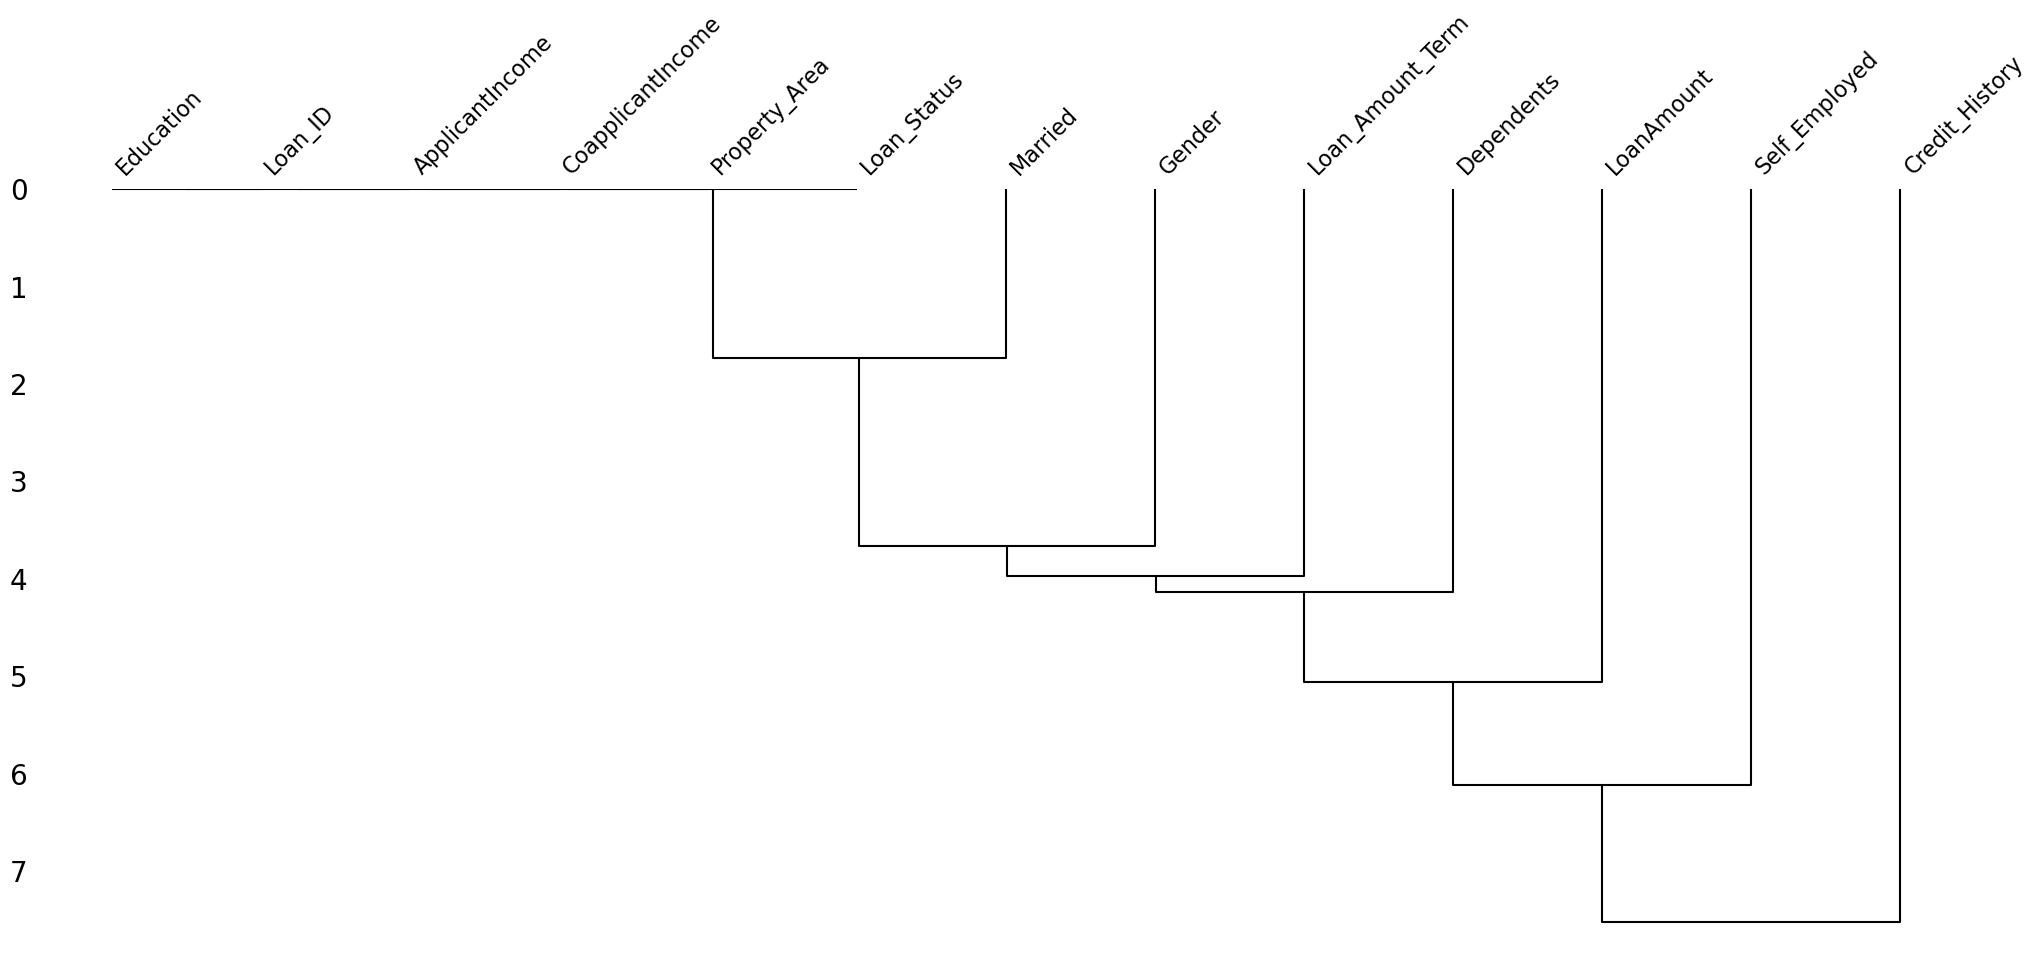

In [127]:
msn.dendrogram(data)

### 4.1.3. Visualisation des valeurs manquantes

<Axes: >

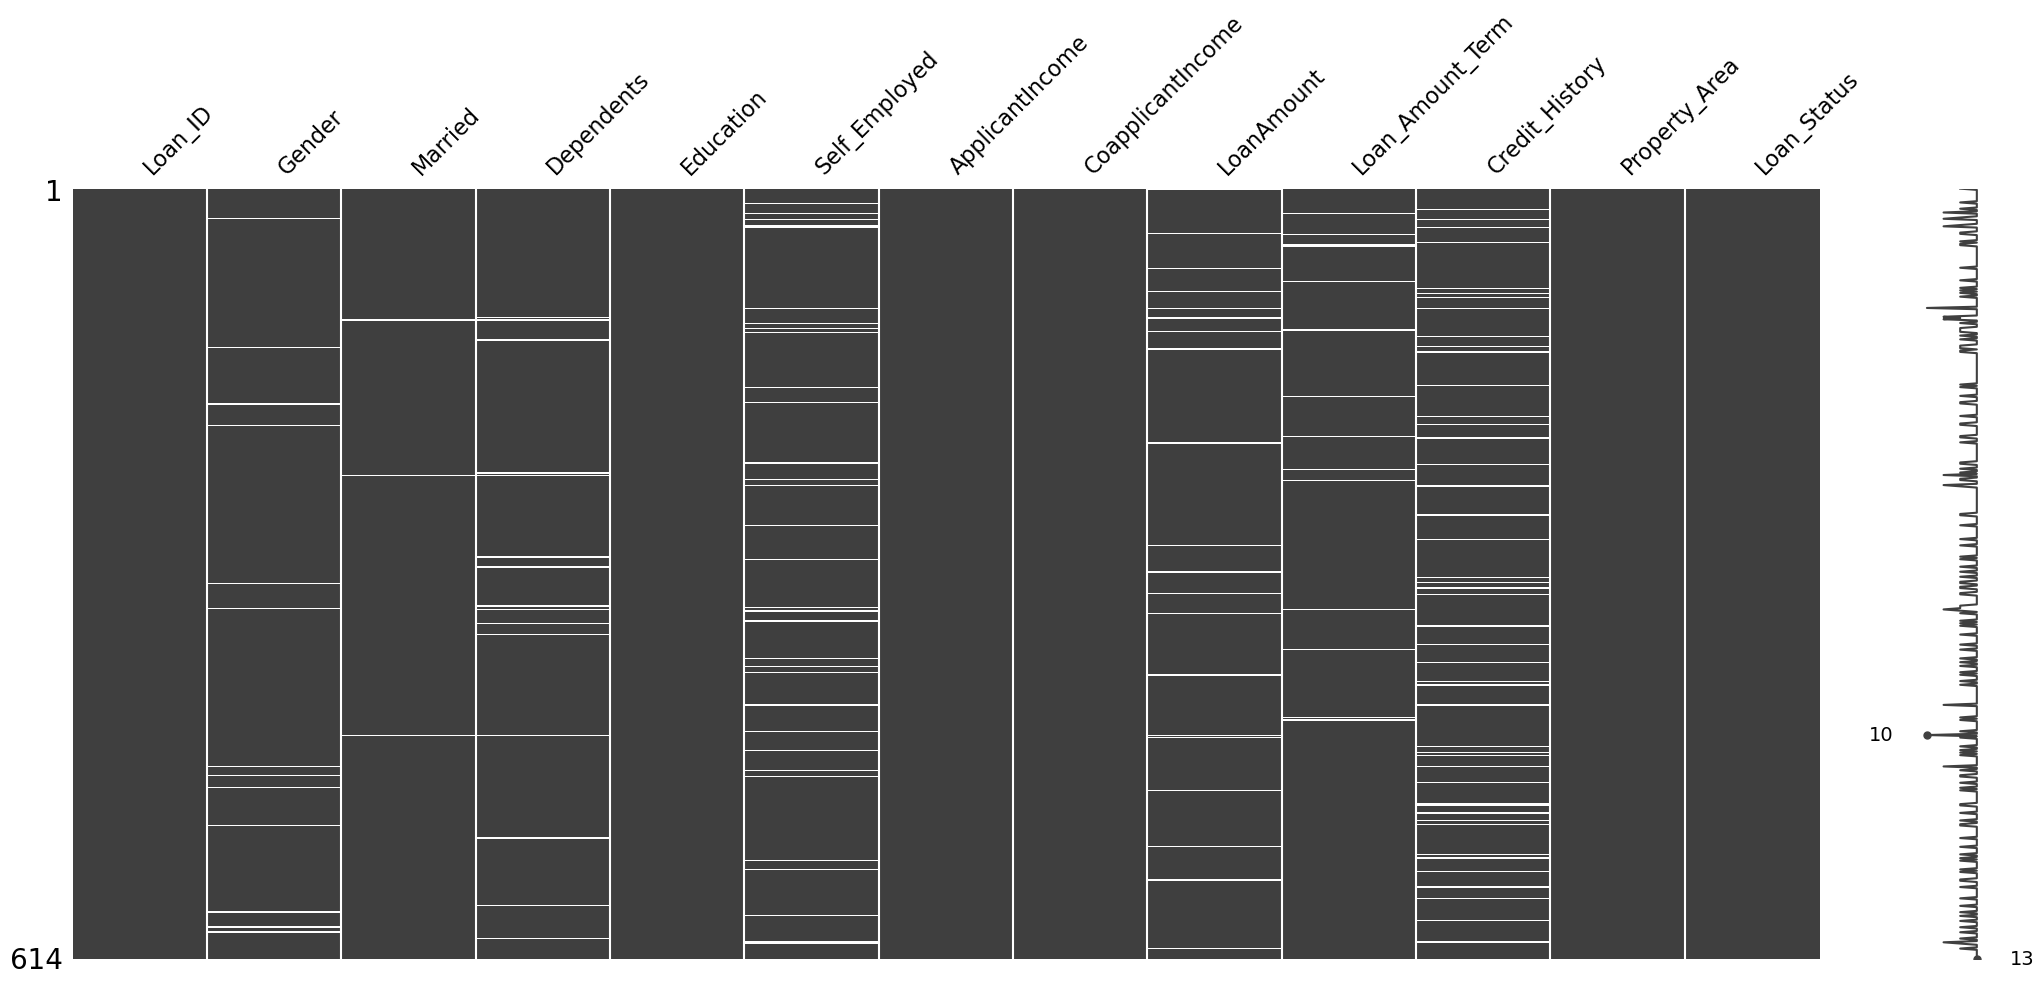

In [128]:
msn.matrix(data)

Les parties en NOIRES sont des places ou nous n'avons pas de valeurs manquantes tandis que les
parties BLANCHES ou en traits sont les valeurs manquantes

## 4.2. Traitement des valeurs manquantes par Imputation

## 4.2.1. Variables categorielles

### 4.2.1.1 Separation du dataset en donnees categorielle et numerique

In [129]:
data_cat = []   # valeur categorielle
data_Num = []   # Valeur Numerique

for i, c in enumerate(data.dtypes):
    if c == 'object':
        data_cat.append(data.iloc[:, i])
    else:
        data_Num.append(data.iloc[:, i])

In [130]:
data_cat = pd.DataFrame(data_cat).T
data_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [131]:
data_Num = pd.DataFrame(data_Num).T
data_Num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0
...,...,...,...,...
609,2900.0,0.0,71.0,360.0
610,4106.0,0.0,40.0,180.0
611,8072.0,240.0,253.0,360.0
612,7583.0,0.0,187.0,360.0


In [132]:
## Fonction pour remplacer les valeurs manquantes par le mode (Modalite la plus representee)

data_cat = data_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
data_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y


## 4.2.2. Variables numeriques

In [133]:
data_Num.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

### 4.2.2.1 Imputation par la moyenne de la variable LoanAmount

In [134]:
data_Num['LoanAmount'].fillna(data_Num['LoanAmount'].mean(), inplace=True)

### 4.2.2.1 Imputation par la mediane de la variable Loan_Amount_Term

In [135]:
data_Num['Loan_Amount_Term'].fillna(data_Num['Loan_Amount_Term'].median(), inplace=True)

In [136]:
data_Num.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

## 4.3. Recherche des doublons dans le data set

In [137]:
data.loc[data[['Loan_ID','Gender','Married']].duplicated(keep= False),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


 Pas de doublons dans ce dataset

# Visualisation apres traitement de valeurs manquantes

In [138]:
data_clean =  pd.concat([data_cat, data_Num], axis = 1)

<Axes: >

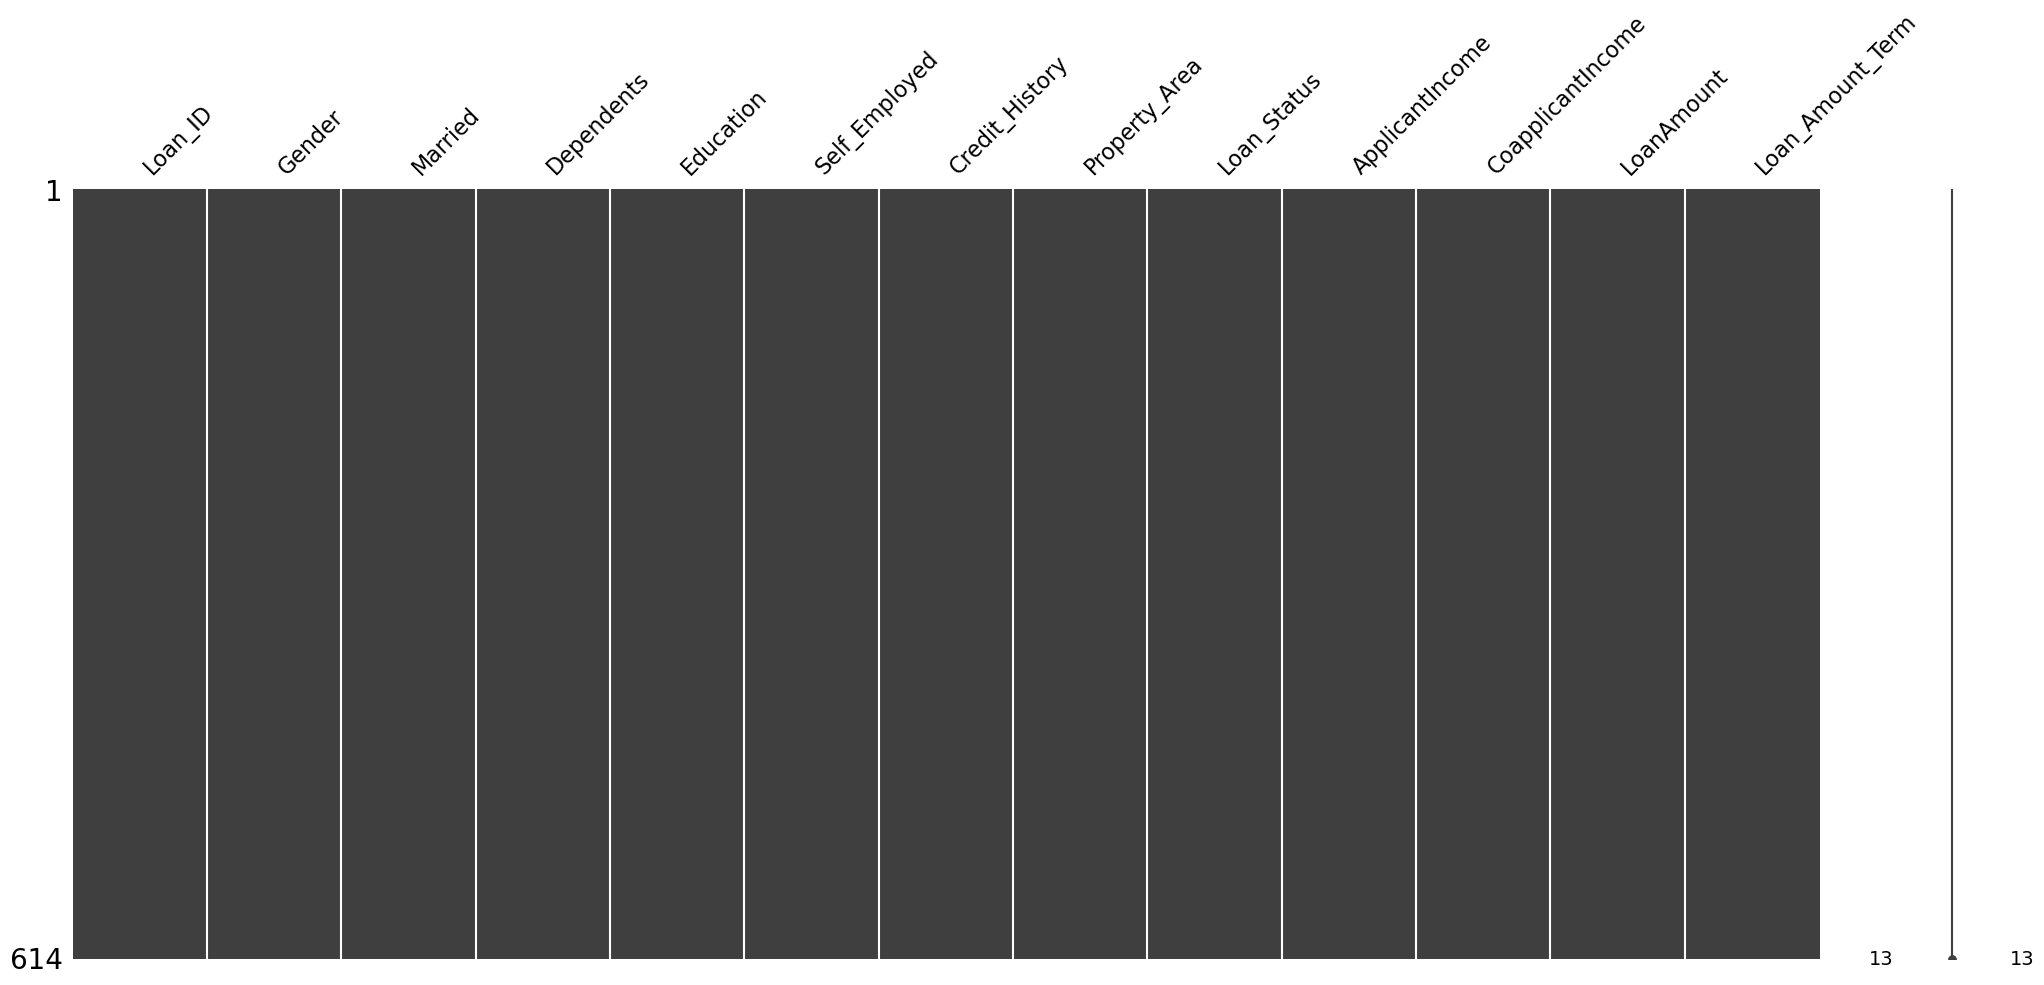

In [139]:
msn.matrix(data_clean)

## 4.4. Identification des valeurs aberantes (outliers) 

In [140]:
data_clean.describe()

,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.855049,5403.459283,1621.245798,146.412162,342.410423
std,0.352339,6109.041673,2926.248369,84.037468,64.428629
min,0.000000,150.000000,0.000000,9.000000,12.000000
25%,1.000000,2877.500000,0.000000,100.250000,360.000000
50%,1.000000,3812.500000,1188.500000,129.000000,360.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000
max,1.000000,81000.000000,41667.000000,700.000000,480.000000


In [141]:
def outlierab(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    Borne_Inf = Q1 - 1.5*IQR
    Borne_Sup = Q3 + 1.5*IQR
    return  df[(df[columns]>Borne_Inf) | (df[columns]<Borne_Sup)]

In [142]:
outlier = outlierab(data_clean,'ApplicantIncome')
outlier2 = outlierab(outlier,'CoapplicantIncome')
outlier3 = outlierab(outlier2,'LoanAmount')
dft = outlierab(outlier2,'Credit_History')
dft

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
7,LP001014,Male,Yes,3+,Graduate,No,0.0,Semiurban,N,3036.0,2504.0,158.0,360.0
17,LP001036,Female,No,0,Graduate,No,0.0,Urban,N,3510.0,0.0,76.0,360.0
20,LP001043,Male,Yes,0,Not Graduate,No,0.0,Urban,N,7660.0,0.0,104.0,360.0
22,LP001047,Male,Yes,0,Not Graduate,No,0.0,Semiurban,N,2600.0,1911.0,116.0,360.0
23,LP001050,Male,Yes,2,Not Graduate,No,0.0,Rural,N,3365.0,1917.0,112.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,Male,Yes,0,Graduate,No,0.0,Semiurban,N,3087.0,2210.0,136.0,360.0
584,LP002911,Male,Yes,1,Graduate,No,0.0,Rural,N,2787.0,1917.0,146.0,360.0
589,LP002926,Male,Yes,2,Graduate,Yes,0.0,Semiurban,N,2726.0,0.0,106.0,360.0
597,LP002943,Male,No,0,Graduate,No,0.0,Semiurban,N,2987.0,0.0,88.0,360.0


# 5. Statistique descriptive

## 5.1. Mesures de Tendance Centrale (Position)  

### 5.1.1. La moyenne arithmetique

In [143]:
new_df = data_Num

In [144]:
new_df.mean()

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.410423
dtype: float64

In [145]:
# La moyenne avec numpy d'une variable
ApplicantIncome = np.mean(new_df['ApplicantIncome'])
CoapplicantIncome=np.mean(new_df['CoapplicantIncome'])
LoanAmount=np.mean(new_df['LoanAmount'])
Loan_Amount_Term=np.mean(new_df['Loan_Amount_Term'])
print(f"La moyenne de ApplicantIncome est : {ApplicantIncome}")
print(f"La moyenne de CoapplicantIncome est : {CoapplicantIncome}")
print(f"La moyenne de LoanAmount est : {LoanAmount}")
print(f"La moyenne de Loan_Amount_Term est : {Loan_Amount_Term}")

La moyenne de ApplicantIncome est : 5403.459283387622
La moyenne de CoapplicantIncome est : 1621.2457980271008
La moyenne de LoanAmount est : 146.41216216216216
La moyenne de Loan_Amount_Term est : 342.4104234527687


### 5.1.2. Le mode
C'est valeur dominante d'une serie de donnee c'est-à-dire la variable ayant le plus grand effectif ou frequences élevée

In [146]:
new_df.mode()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,2500.0,0.0,146.412162,360.0


In [147]:
# Calcul du mode avec le module statistics
mode_ApplicantIncome = statistics.mode(new_df['ApplicantIncome'])
mode_CoapplicantIncome = statistics.mode(new_df['CoapplicantIncome'])
mode_LoanAmount = statistics.mode(new_df['LoanAmount'])
mode_Loan_Amount_Term = statistics.mode(new_df['Loan_Amount_Term'])
print(f"La moyenne de ApplicantIncome est : {mode_ApplicantIncome}")
print(f"La moyenne de CoapplicantIncome est : {mode_CoapplicantIncome}")
print(f"La moyenne de LoanAmount est : {mode_LoanAmount}")
print(f"La moyenne de Loan_Amount_Term est : {mode_Loan_Amount_Term}")

La moyenne de ApplicantIncome est : 2500.0
La moyenne de CoapplicantIncome est : 0.0
La moyenne de LoanAmount est : 146.41216216216216
La moyenne de Loan_Amount_Term est : 360.0


### 5.1.3. La mediane
Elle partage la série statistique en deux parties égales

In [148]:
new_df.median()

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            129.0
Loan_Amount_Term      360.0
dtype: float64

In [149]:
# Calcul de la mediane avec le module statistics

mediane_ApplicantIncome = statistics.median(new_df['ApplicantIncome'])
mediane_CoapplicantIncome = statistics.median(new_df['CoapplicantIncome'])
mediane_LoanAmount = statistics.median(new_df['LoanAmount'])
mediane_Loan_Amount_Term = statistics.median(new_df['Loan_Amount_Term'])

print(f"La moyenne de ApplicantIncome est : {mediane_ApplicantIncome}")
print(f"La moyenne de CoapplicantIncome est : {mediane_CoapplicantIncome}")
print(f"La moyenne de LoanAmount est : {mediane_LoanAmount}")
print(f"La moyenne de Loan_Amount_Term est : {mediane_Loan_Amount_Term}")

La moyenne de ApplicantIncome est : 3812.5
La moyenne de CoapplicantIncome est : 1188.5
La moyenne de LoanAmount est : 129.0
La moyenne de Loan_Amount_Term est : 360.0


### 5.1.4. Les quantilles
Partagent la série statistique ordonnées en quatre parties égales

In [150]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)

print(f"Le premier quartille est : {Q1}")
print(f"Le troisieme quartille est : {Q3}")

Le premier quartille est : ApplicantIncome      2877.50
CoapplicantIncome       0.00
LoanAmount            100.25
Loan_Amount_Term      360.00
Name: 0.25, dtype: float64
Le troisieme quartille est : ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Name: 0.75, dtype: float64


## 5.2. Mesures de Dispersion

### 5.2.1. La variance

In [151]:
new_df.var()

ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.062296e+03
Loan_Amount_Term     4.151048e+03
dtype: float64

In [152]:
# Avec numpy
np.var(new_df)

ApplicantIncome      3.725961e+07
CoapplicantIncome    8.548983e+06
LoanAmount           7.050794e+03
Loan_Amount_Term     4.144288e+03
dtype: float64

### 5.2.2. L'ecart type ou standar deviation

In [153]:
new_df.std()

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             84.037468
Loan_Amount_Term       64.428629
dtype: float64

In [154]:
# Avec numpy
np.std(new_df)

ApplicantIncome      6104.064857
CoapplicantIncome    2923.864460
LoanAmount             83.969005
Loan_Amount_Term       64.376141
dtype: float64

### 5.2.3. Le minimum et le maximum

In [155]:
max_Ap = max(new_df['ApplicantIncome'])
min_Ap = min(new_df['ApplicantIncome'])

max_Co = max(new_df['CoapplicantIncome'])
min_Co = min(new_df['CoapplicantIncome'])

max_LA = max(new_df['LoanAmount'])
min_LA = min(new_df['LoanAmount'])

max_LAT = max(new_df['Loan_Amount_Term'])
min_LAT = min(new_df['Loan_Amount_Term'])

print(f"LE MAXIMUM de ApplicantIncome est : {max_Ap} et son MINIMUM est: {min_Ap}")
print(f"LE MAXIMUM de CoapplicantIncome est : {max_Co} et son MINIMUM est: {min_Co}")
print(f"LE MAXIMUM de LoanAmount est : {max_LA} et son MINIMUM est: {min_LA}")
print(f"LE MAXIMUM de Loan_Amount_Term est : {max_LAT} et son MINIMUM est: {min_LAT}")

LE MAXIMUM de ApplicantIncome est : 81000.0 et son MINIMUM est: 150.0
LE MAXIMUM de CoapplicantIncome est : 41667.0 et son MINIMUM est: 0.0
LE MAXIMUM de LoanAmount est : 700.0 et son MINIMUM est: 9.0
LE MAXIMUM de Loan_Amount_Term est : 480.0 et son MINIMUM est: 12.0


### 5.2.4. L'etendu
C'est la difference entre le maximum et le minimum

In [156]:
E1 = max(new_df['ApplicantIncome']) - min(new_df['ApplicantIncome'])
E2 = max(new_df['CoapplicantIncome']) - min(new_df['CoapplicantIncome'])
E3 = max(new_df['LoanAmount']) - min(new_df['LoanAmount'])
E4 = max(new_df['Loan_Amount_Term']) - min(new_df['Loan_Amount_Term'])

print(f"L'ETENDU de ApplicantIncome est : {E1}")
print(f"L'ETENDU de CoapplicantIncome est : {E2}")
print(f"L'ETENDU de LoanAmount est : {E3}")
print(f"L'ETENDU de Loan_Amount_Term est : {E4}")

L'ETENDU de ApplicantIncome est : 80850.0
L'ETENDU de CoapplicantIncome est : 41667.0
L'ETENDU de LoanAmount est : 691.0
L'ETENDU de Loan_Amount_Term est : 468.0


### 5.2.4. L'intervalle interquartille (IQR)
C'est la difference entre le troisieme et le premier quartile

In [157]:
IQR = Q3 - Q1
IQR

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
dtype: float64

## 5.3 Resumé statistiques

In [158]:
rs = new_df.describe()
print(f"Le resumé statistique de notre data set est : \n")
print(rs.to_string())

Le resumé statistique de notre data set est : 

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       614.000000         614.000000  614.000000        614.000000
mean       5403.459283        1621.245798  146.412162        342.410423
std        6109.041673        2926.248369   84.037468         64.428629
min         150.000000           0.000000    9.000000         12.000000
25%        2877.500000           0.000000  100.250000        360.000000
50%        3812.500000        1188.500000  129.000000        360.000000
75%        5795.000000        2297.250000  164.750000        360.000000
max       81000.000000       41667.000000  700.000000        480.000000


# 6. ANALYSE EXPLORATOIRE

## 6.1. Variable categorielle

### 6.1.1 Gender

In [159]:
data_cat['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

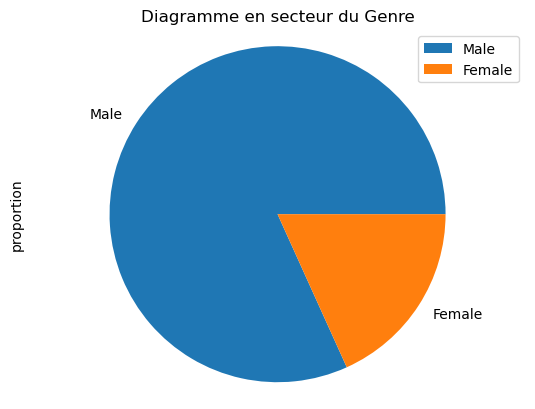

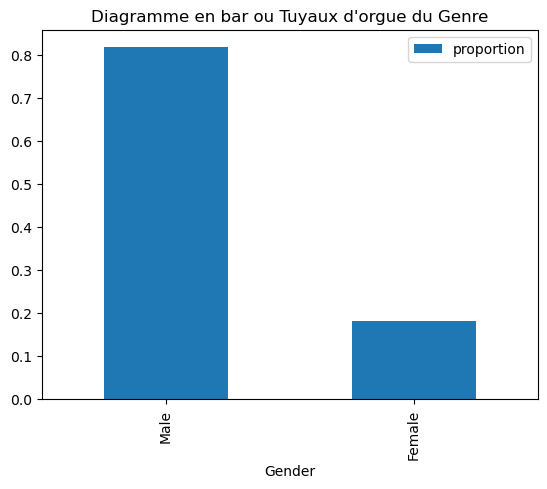

In [160]:
data_cat['Gender'].value_counts(normalize=True).plot(kind="pie")
plt.axis("equal")
plt.title("Diagramme en secteur du Genre")
plt.legend()
plt.show()

data_cat['Gender'].value_counts(normalize=True).plot(kind="bar")
plt.title("Diagramme en bar ou Tuyaux d'orgue du Genre")
plt.legend()
plt.show()

In [161]:
countMale = len(data_clean[data_cat.Gender=="Male"])
countFemale = len(data_clean[data_cat.Gender=="Female"])

print(f"Le pourcentage de Males est : {(countMale/len(data_cat.Gender))*100}")
print(f"Le pourcentage de Female est : {(countFemale/len(data_cat.Gender))*100}")

Le pourcentage de Males est : 81.75895765472313
Le pourcentage de Female est : 18.241042345276874


### 6.1.2 Married

In [162]:
data_cat['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

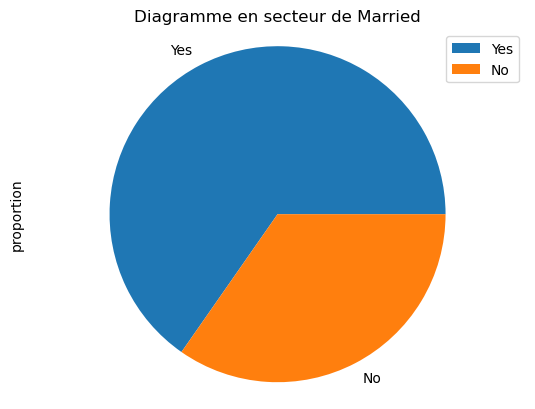

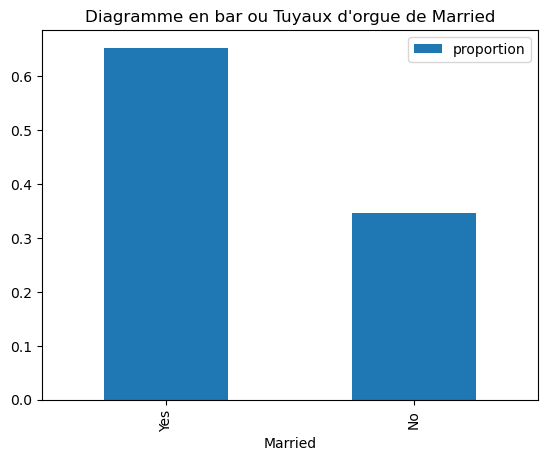

In [163]:
data_cat['Married'].value_counts(normalize=True).plot(kind="pie")
plt.axis("equal")
plt.title("Diagramme en secteur de Married")
plt.legend()
plt.show()

data_cat['Married'].value_counts(normalize=True).plot(kind="bar")
plt.title("Diagramme en bar ou Tuyaux d'orgue de Married")
plt.legend()
plt.show()

In [164]:
countMarried = len(data_clean[data_cat.Married=="Yes"])
countnotMarried = len(data_clean[data_cat.Married=="No"])

print(f"Le pourcentage de Marié est : {(countMarried/len(data_cat.Married))*100}")
print(f"Le pourcentage de non Marié est : {(countnotMarried/len(data_cat.Married))*100}")

Le pourcentage de Marié est : 65.30944625407166
Le pourcentage de non Marié est : 34.69055374592834


### 6.1.3 Education

In [165]:
data_cat['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

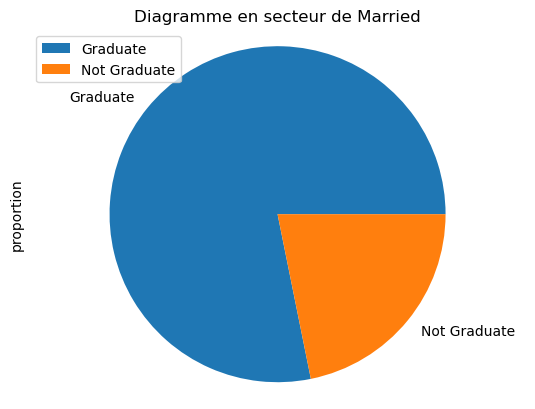

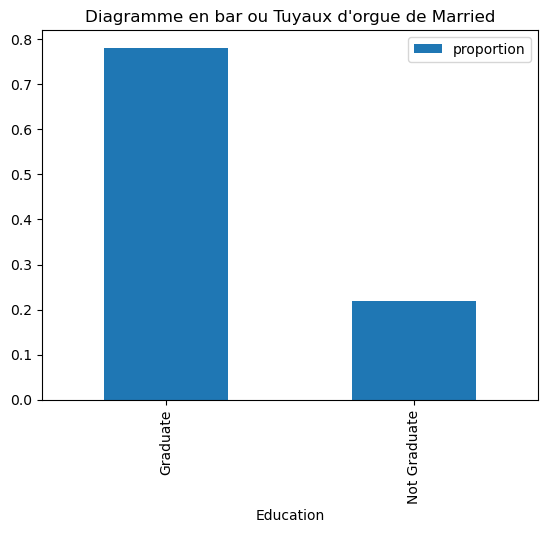

In [166]:
data_cat['Education'].value_counts(normalize=True).plot(kind="pie")
plt.axis("equal")
plt.title("Diagramme en secteur de Married")
plt.legend()
plt.show()

data_cat['Education'].value_counts(normalize=True).plot(kind="bar")
plt.title("Diagramme en bar ou Tuyaux d'orgue de Married")
plt.legend()
plt.show()

In [167]:
countGraduate = len(data_clean[data_cat.Education=="Graduate"])
countNotGraduate = len(data_clean[data_cat.Education=="Not Graduate"])

print(f"Le pourcentage de Graduate est : {(countGraduate/len(data_cat.Education))*100}")
print(f"Le pourcentage de Not Graduate est : {(countNotGraduate/len(data_cat.Education))*100}")

Le pourcentage de Graduate est : 78.17589576547232
Le pourcentage de Not Graduate est : 21.824104234527688


### 6.1.4 Self_Employed

In [168]:
data_cat['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

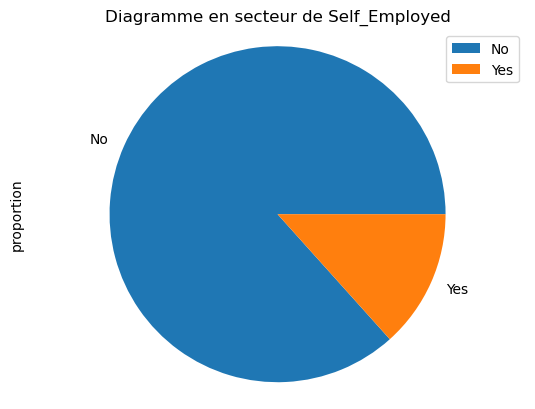

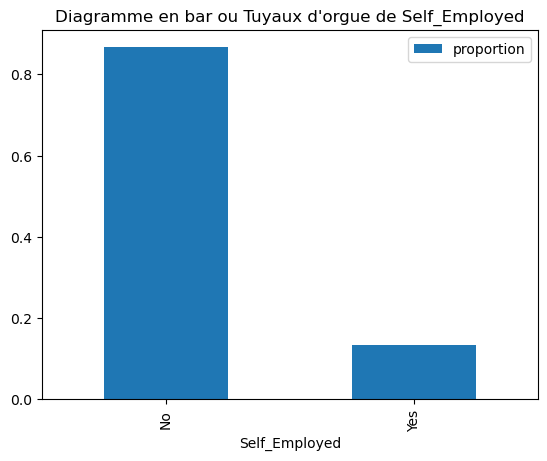

In [169]:
data_cat['Self_Employed'].value_counts(normalize=True).plot(kind="pie")
plt.axis("equal")
plt.title("Diagramme en secteur de Self_Employed")
plt.legend()
plt.show()

data_cat['Self_Employed'].value_counts(normalize=True).plot(kind="bar")
plt.title("Diagramme en bar ou Tuyaux d'orgue de Self_Employed")
plt.legend()
plt.show()

In [170]:
countSelf_Employed = len(data_clean[data_cat.Self_Employed=="Yes"])
countNotSelf_Employed = len(data_clean[data_cat.Self_Employed=="No"])

print(f"Le pourcentage de Self_Employed est : {(countSelf_Employed/len(data_cat.Self_Employed))*100}")
print(f"Le pourcentage de No Self_Employed est : {(countNotSelf_Employed/len(data_cat.Self_Employed))*100}")

Le pourcentage de Self_Employed est : 13.355048859934854
Le pourcentage de No Self_Employed est : 86.64495114006515


### 6.1.5 Credit_History

In [202]:
data_cat['Credit_History'].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

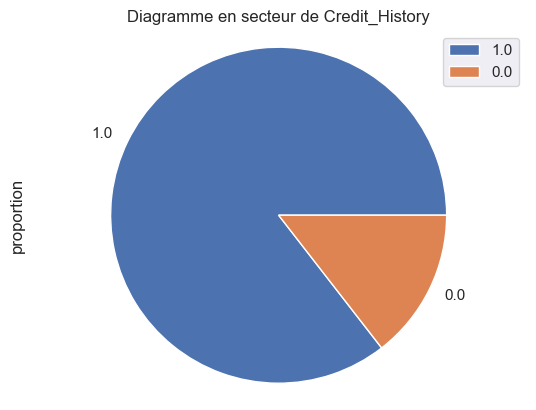

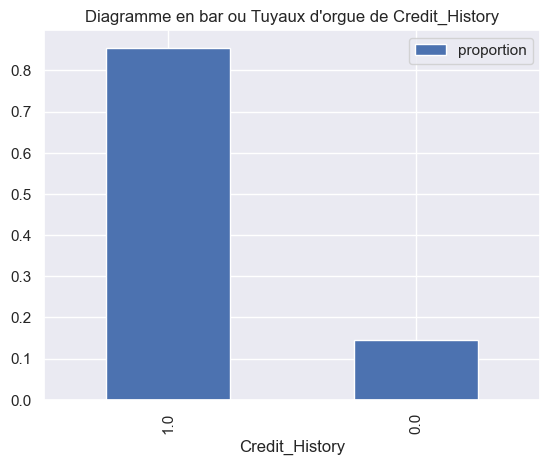

In [203]:
data_cat['Credit_History'].value_counts(normalize=True).plot(kind="pie")
plt.axis("equal")
plt.title("Diagramme en secteur de Credit_History")
plt.legend()
plt.show()

data_cat['Credit_History'].value_counts(normalize=True).plot(kind="bar")
plt.title("Diagramme en bar ou Tuyaux d'orgue de Credit_History")
plt.legend()
plt.show()

In [205]:
countCredit_History = len(data_clean[data_cat.Credit_History==0.0])
countNotSelf_Employed = len(data_clean[data_cat.Credit_History==1.0])

print(f"Le pourcentage de Self_Employed est : {(countCredit_History/len(data_cat.Credit_History))*100}")
print(f"Le pourcentage de No Self_Employed est : {(countNotSelf_Employed/len(data_cat.Credit_History))*100}")

Le pourcentage de Self_Employed est : 14.495114006514658
Le pourcentage de No Self_Employed est : 85.50488599348535


### 6.1.6 Property_Area

### 6.1.7 Property_Area

## 6.2 Variable numerique

In [171]:
data_Num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423
std,6109.041673,2926.248369,84.037468,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


### 6.2.1 Loan_Amount_Term

In [172]:
data_Num['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

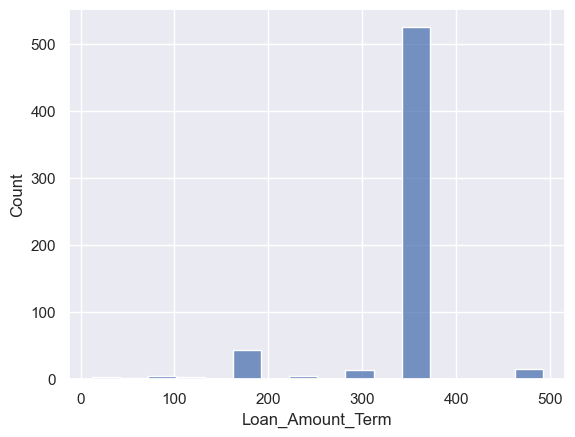

In [192]:
sns.histplot(data=new_df, x="Loan_Amount_Term",bins=30,binwidth=30)

### 6.2.2 ApplicantIncome

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

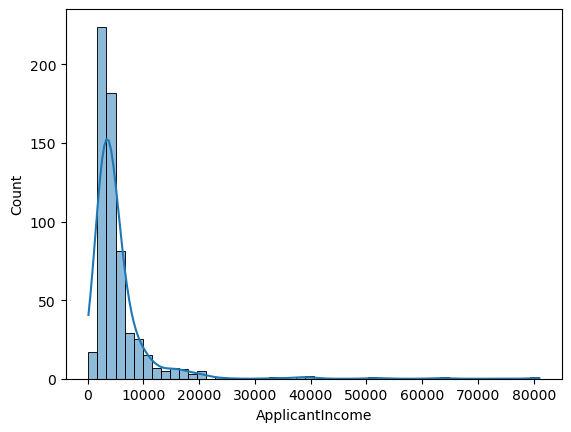

In [173]:
sns.histplot(data=new_df, x="ApplicantIncome",kde=True, bins=50)

### 6.2.3 LoanAmount

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


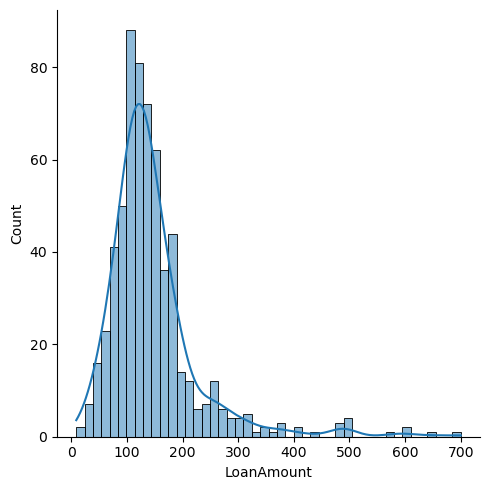

In [174]:
sns.displot(data=new_df, x="LoanAmount", kde=True)

### 6.2.3 CoapplicantIncome

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

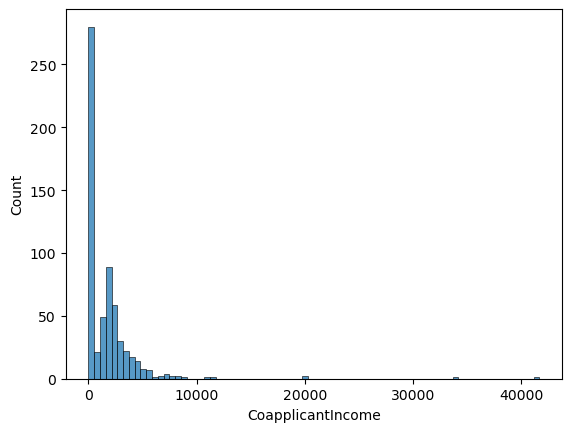

In [190]:
sns.histplot(data=new_df, x="CoapplicantIncome")

## 6.3 Distribution des variables numerique

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

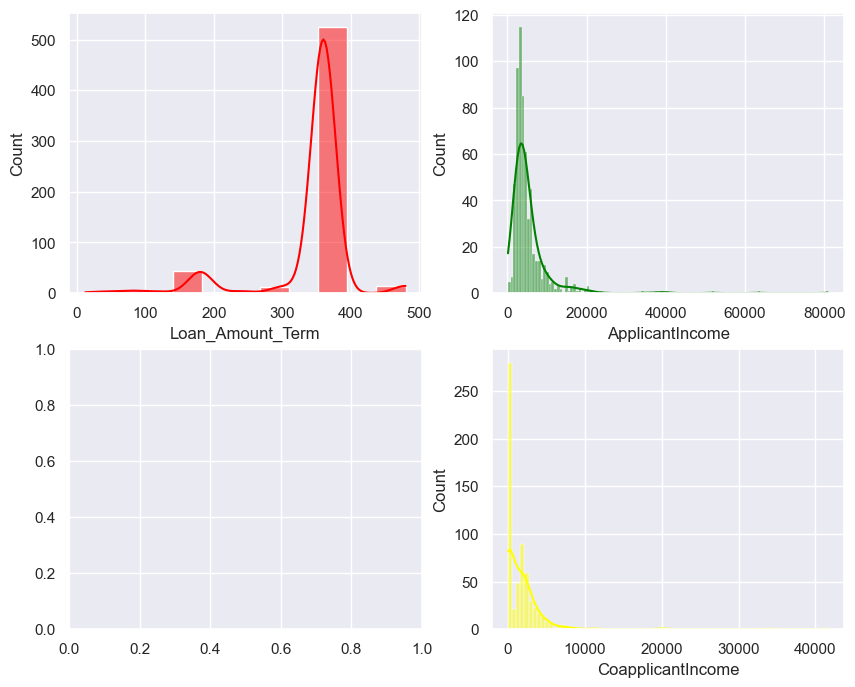

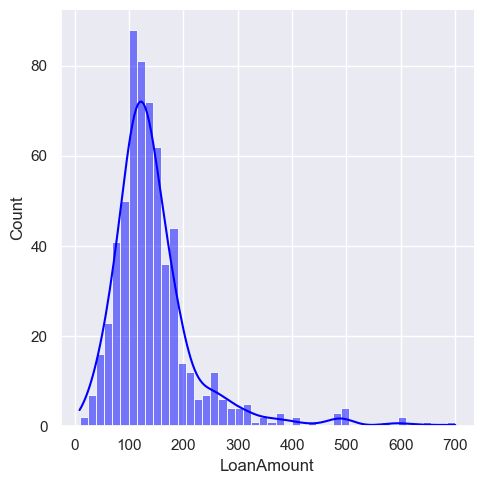

In [196]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(2,2, figsize = (10, 8))

sns.histplot(data=new_df, x="Loan_Amount_Term",kde = True, ax=axs[0,0],color='red')
sns.histplot(data=new_df, x="ApplicantIncome",kde = True, ax=axs[0,1],color='green')
sns.displot(data=new_df, x="LoanAmount", kde = True, ax=axs[1,0],color='blue')
sns.histplot(data=new_df, x="CoapplicantIncome",kde = True, ax=axs[1,1],color='yellow')

## 6.4 Exploration bivarie

### 6.4.1 Relation entre le status credit et historique de credit

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


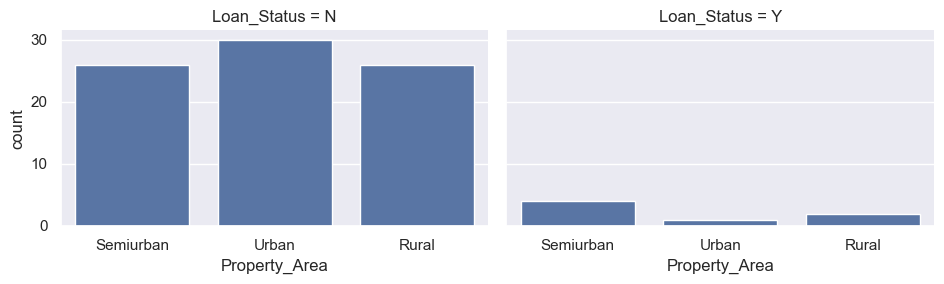

In [211]:
grid=sns.FacetGrid(dft,col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,'Property_Area')

### 6.4.2 Relation entre le status credit et Status de Marie

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


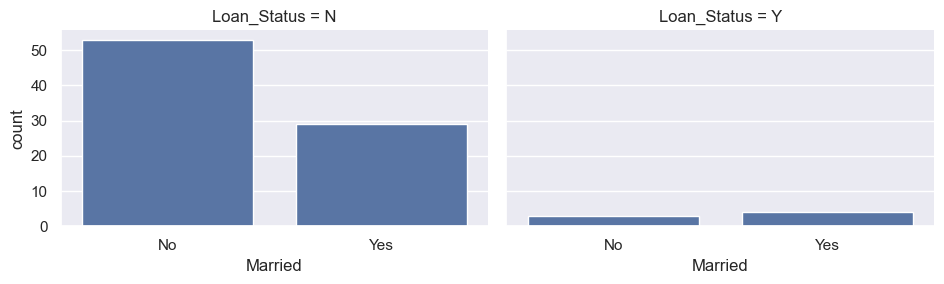

In [212]:
grid=sns.FacetGrid(dft,col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,'Married')

### 6.4.2 Relation entre le status credit et Dependents

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


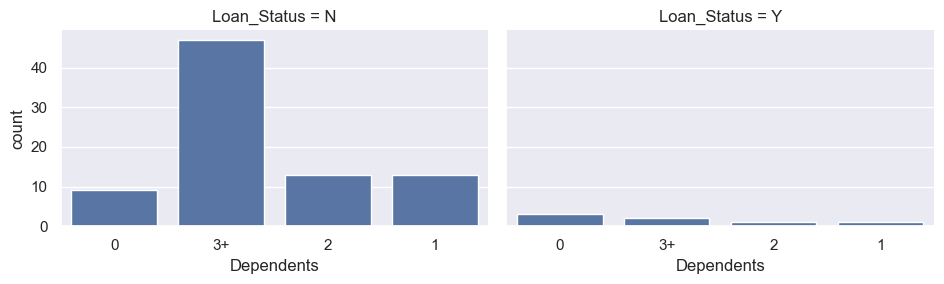

In [214]:
grid=sns.FacetGrid(dft,col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,'Dependents')

### 6.4.2 Relation entre le status credit et ApplicantIncome

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

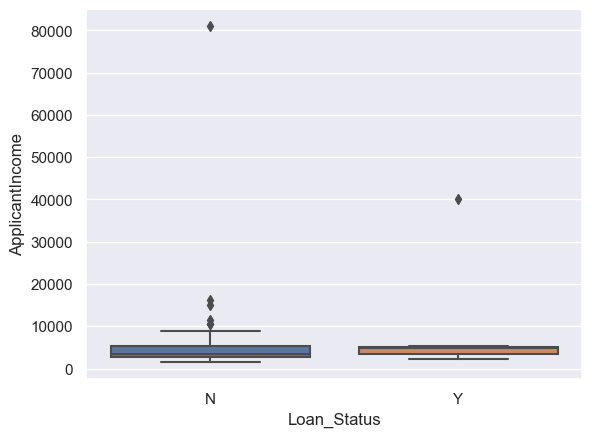

In [215]:
sns.boxplot(data=dft, x="Loan_Status",y="ApplicantIncome")

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


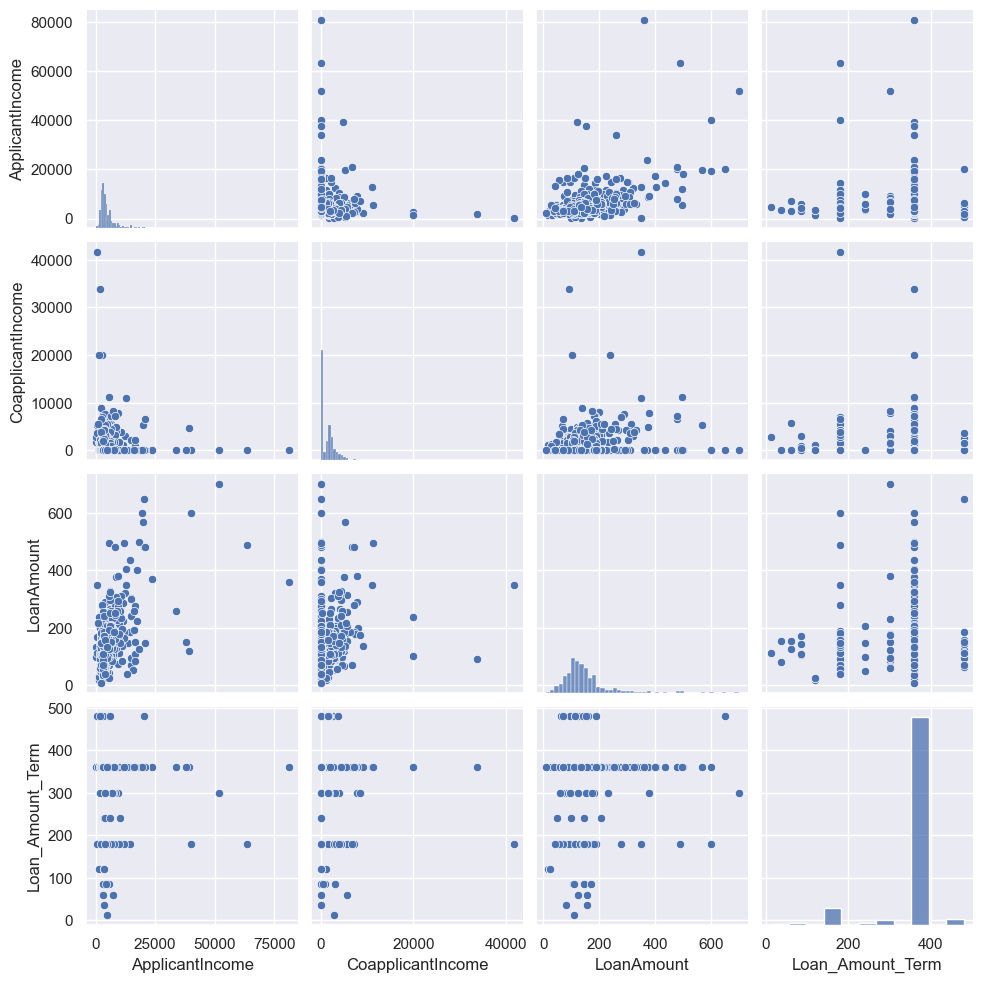

In [216]:
sns.pairplot(data_Num)

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


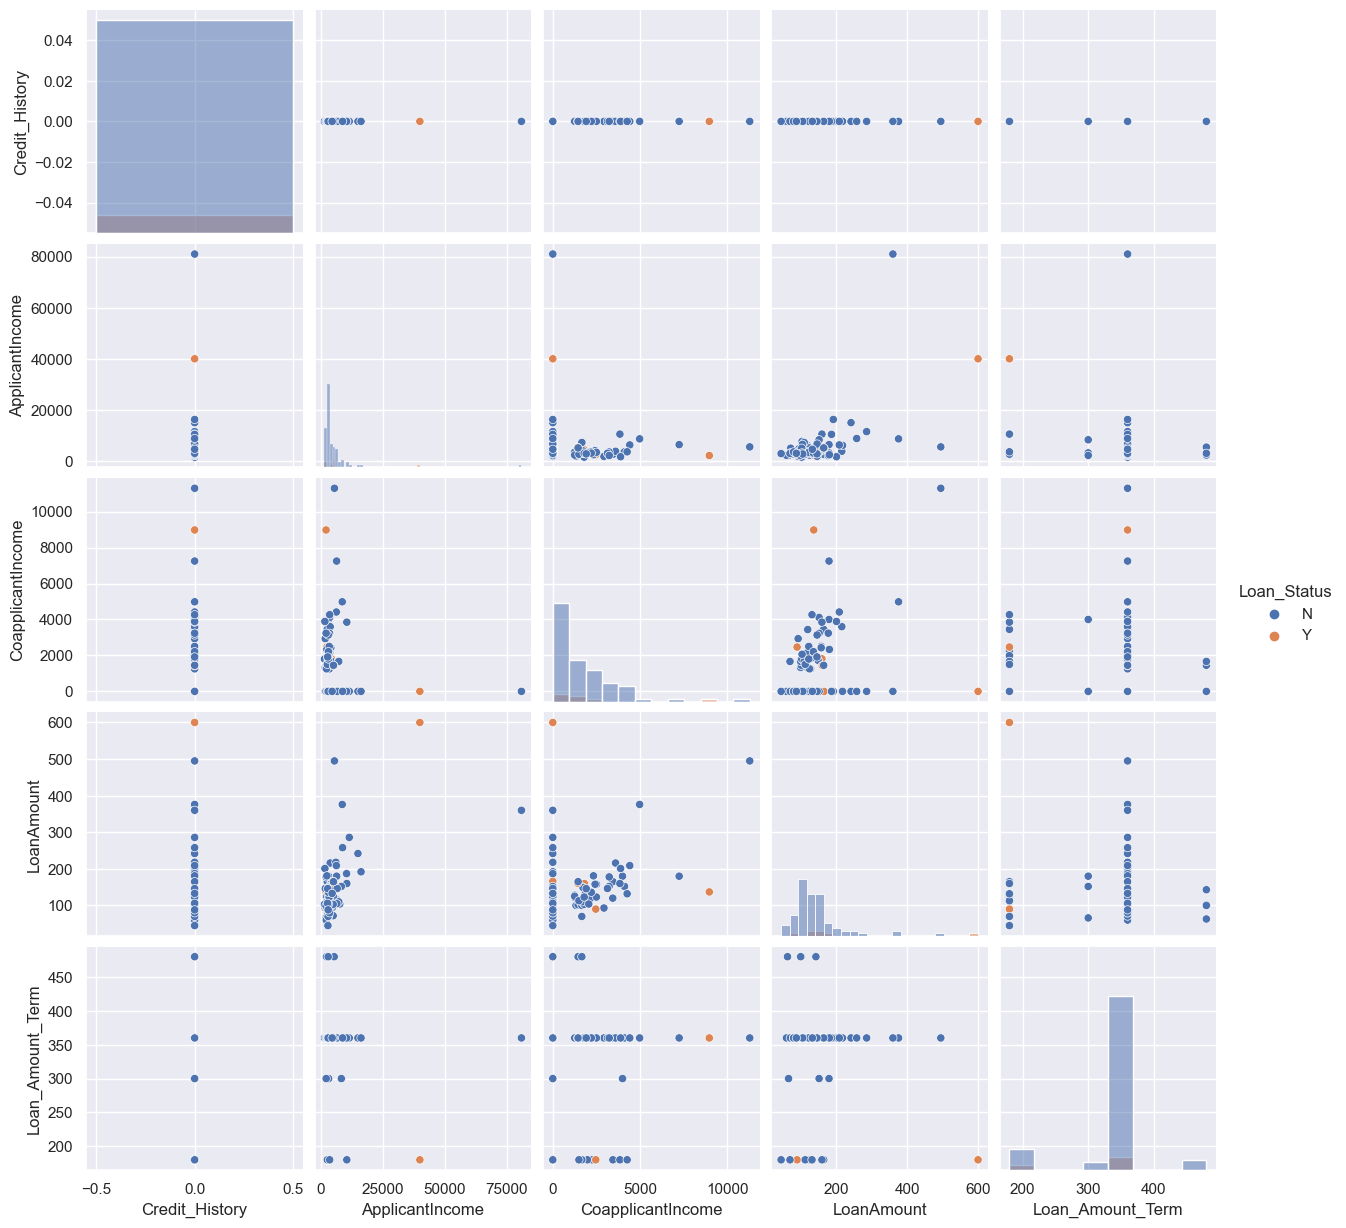

In [221]:
sns.pairplot(dft, hue="Loan_Status",diag_kind="hist")

C:\Users\FIDEL KPOGHOMOU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


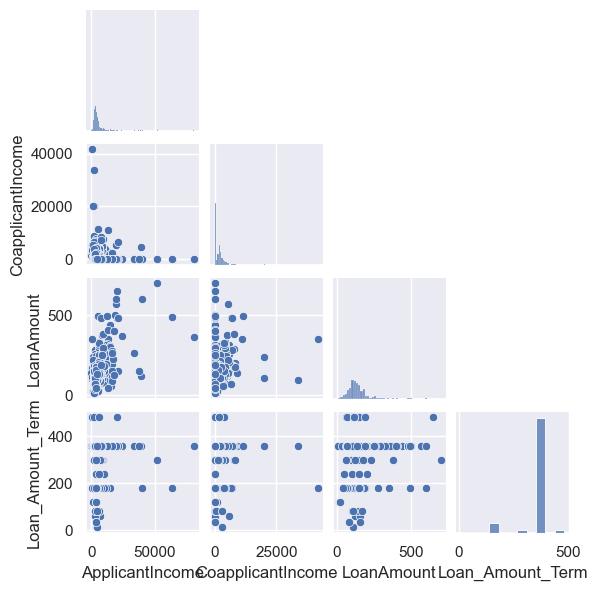

In [224]:
sns.pairplot(data_Num, corner=True,height=1.5)